In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score
from scipy.stats import mode

In [98]:
data = pd.read_csv('Training.csv')

In [99]:
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [100]:
data.columns
data.dropna(axis=1)


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


disease_count = data['pronosis'].value_counts()

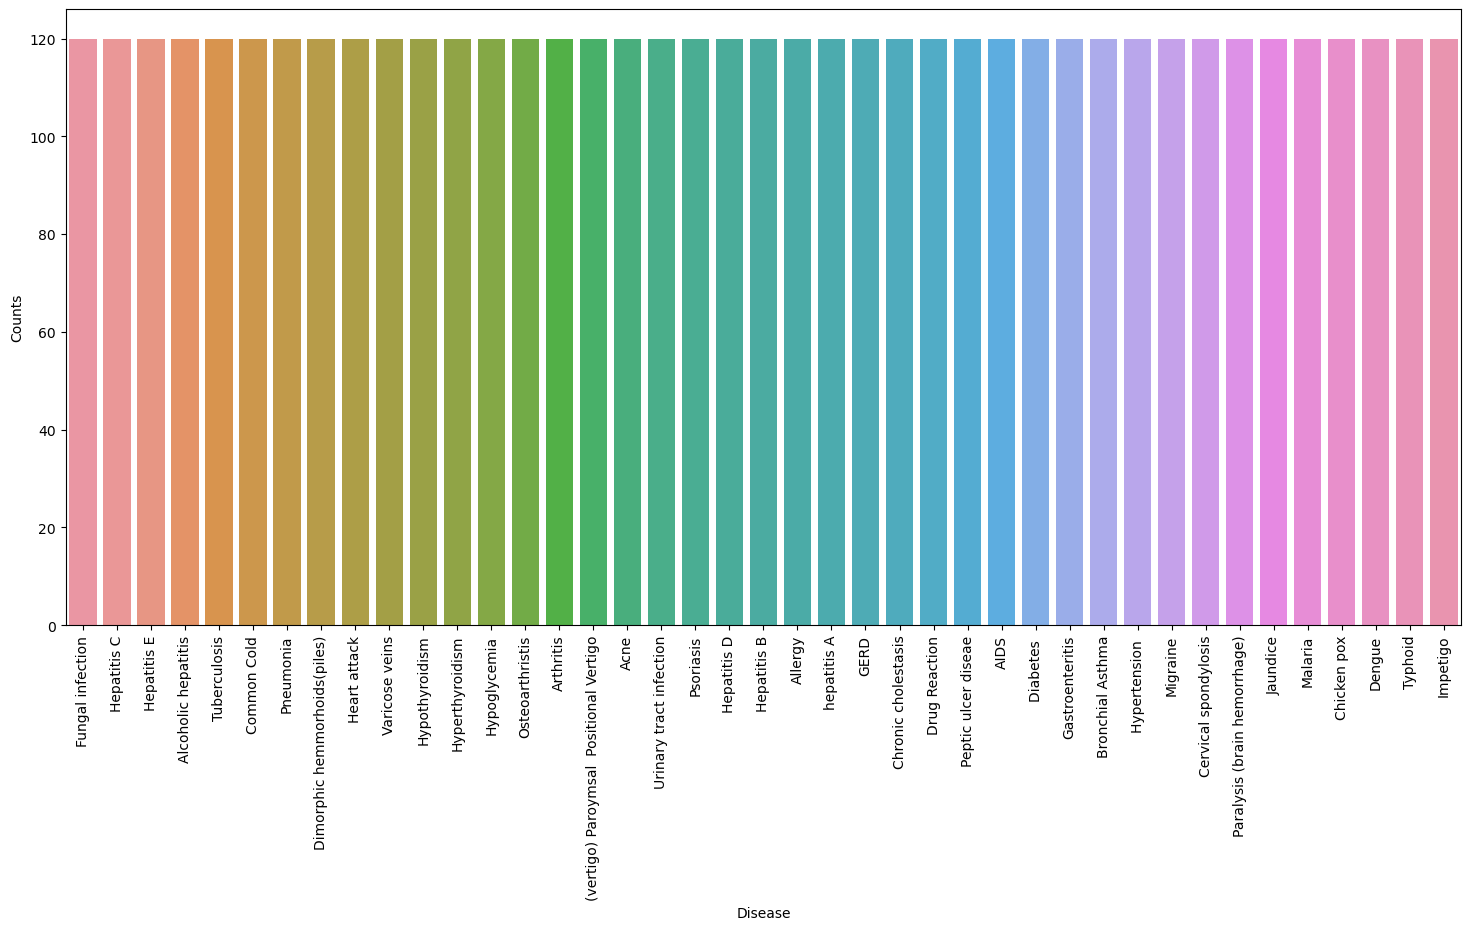

In [101]:
disease_count = data['prognosis'].value_counts()
temp_df = pd.DataFrame({"Disease":disease_count.index,"Counts":disease_count.values})
plt.figure(figsize=(18,8))
sns.barplot(x="Disease",y="Counts",data=temp_df)
plt.xticks(rotation=90)
plt.show()

In [102]:
encoder = LabelEncoder()
data["prognosis"]=encoder.fit_transform(data["prognosis"])

In [103]:
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,15,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,15,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,15,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,15,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,15,NaN


In [104]:
data =data.dropna(axis=1)

In [105]:
X = data.iloc[:,:-1]
y= data.iloc[:,-1]
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=24)

In [106]:
Xtrain.shape

(3936, 132)

In [107]:
Xtest.shape

(984, 132)

In [108]:
ytest.shape

(984,)

In [109]:
ytrain.shape


(3936,)

In [110]:
def cv_score(estimator,X,y):
    return accuracy_score(y,estimator.predict(X))


In [111]:
models = {
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "Random Forest":RandomForestClassifier(random_state=18)
}
for model_name in models:
    model = models[model_name]
    score = cross_val_score(model,X,y,cv=10,n_jobs=-1,scoring=cv_score)
    print(model_name)
    print("scores :{}".format(score))
    print("mean score :{}".format(np.mean(score)))

    

SVC
scores :[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
mean score :1.0
Gaussian NB
scores :[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
mean score :1.0
Random Forest
scores :[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
mean score :1.0


Accuracy On train Data By SVM Classifier : 1.0
Accuracy On test Data By SVM Classifier : 1.0
[[32  0  0 ...  0  0  0]
 [ 0 21  0 ...  0  0  0]
 [ 0  0 20 ...  0  0  0]
 ...
 [ 0  0  0 ... 26  0  0]
 [ 0  0  0 ...  0 18  0]
 [ 0  0  0 ...  0  0 22]]


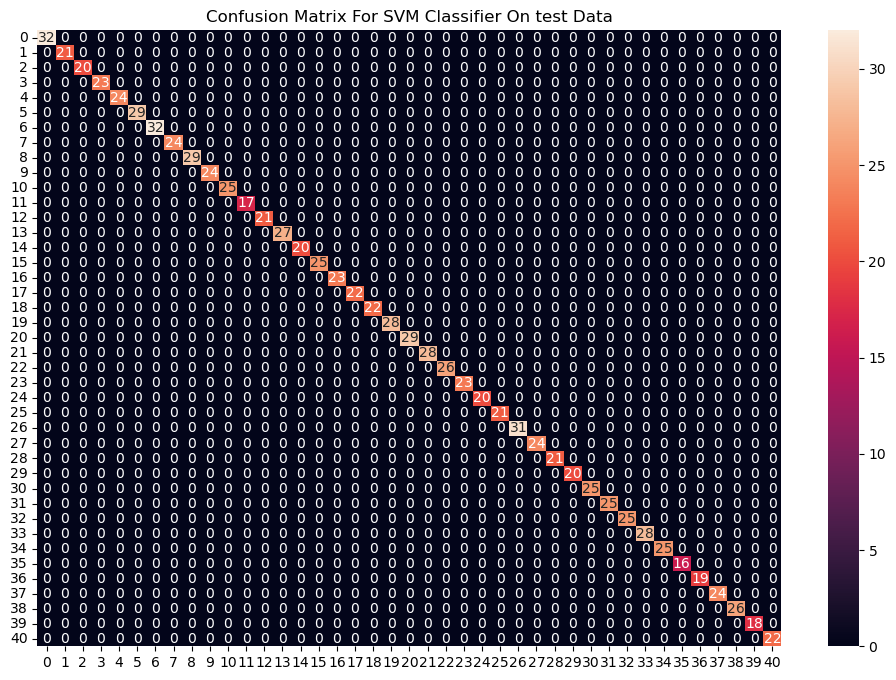

In [112]:
svm_model = SVC()
svm_model.fit(Xtrain,ytrain)
preds= svm_model.predict(Xtest)
acuracy_train = accuracy_score(ytrain,svm_model.predict(Xtrain))
print("Accuracy On train Data By SVM Classifier : {}".format(acuracy_train))
acuracy_test = accuracy_score(ytest,preds)
print("Accuracy On test Data By SVM Classifier : {}".format(acuracy_test))
confusion_mx = confusion_matrix(ytest,preds)
print(confusion_mx)
plt.figure(figsize=(12,8))
sns.heatmap(confusion_mx,annot=True)
plt.title("Confusion Matrix For SVM Classifier On test Data") 
plt.show()

Accuracy On train Data By Naive Bayes Classifier : 1.0
Accuracy On test Data By Naive Bayes Classifier : 1.0


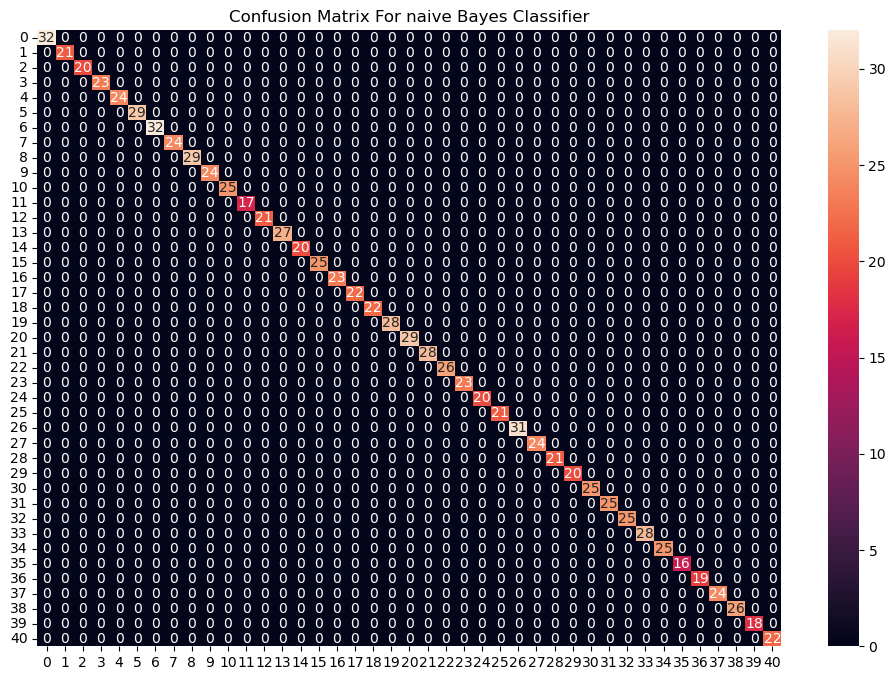

In [113]:
nb_model = GaussianNB()
nb_model.fit(Xtrain,ytrain)
preds = nb_model.predict(Xtest)
accuracy_train = accuracy_score(ytrain,nb_model.predict(Xtrain))
accuracy_test= accuracy_score(ytest,preds)
print("Accuracy On train Data By Naive Bayes Classifier : {}".format(accuracy_train))
print("Accuracy On test Data By Naive Bayes Classifier : {}".format(accuracy_test))
conf_mx = confusion_matrix(ytest,preds)
plt.figure(figsize=(12,8))
sns.heatmap(conf_mx,annot=True)
plt.title("Confusion Matrix For naive Bayes Classifier")
plt.show()

Accuracy on Train Data Using Random Forest Classifier :1.0
Accuracy on Test Data Using Random Forest Classifier :1.0


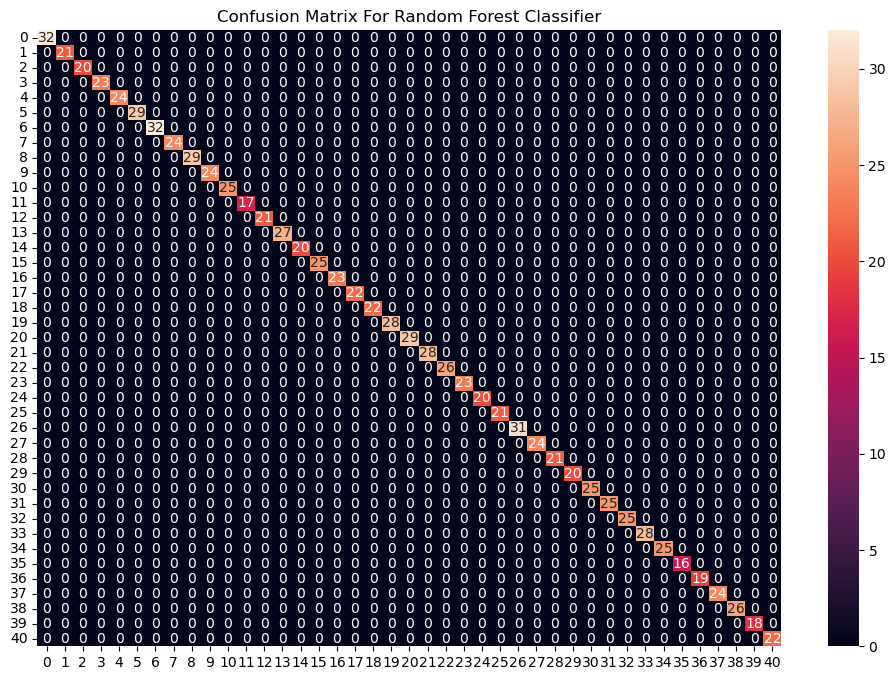

In [114]:
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(Xtrain,ytrain)
preds_train = rf_model.predict(Xtrain)
preds_test = rf_model.predict(Xtest)
accuracy_train = accuracy_score(ytrain,preds_train)
accuracy_test = accuracy_score(ytest,preds_test)
print("Accuracy on Train Data Using Random Forest Classifier :{}".format(accuracy_train))
print("Accuracy on Test Data Using Random Forest Classifier :{}".format(accuracy_test))
cnf_mx = confusion_matrix(ytest,preds_test)
plt.figure(figsize=(12,8))
sns.heatmap(cnf_mx,annot=True)
plt.title("Confusion Matrix For Random Forest Classifier")
plt.show()

/var/folders/jw/fc8cmphd51j26cn4p980vb700000gn/T/ipykernel_21402/3075592694.py:18: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  final_pred = [mode([i,j,k])[0][0]for i,j,k in zip(svm_preds,nb_preds,rf_preds)]


Accuracy on Testing Dataset by the combined Models :1.0


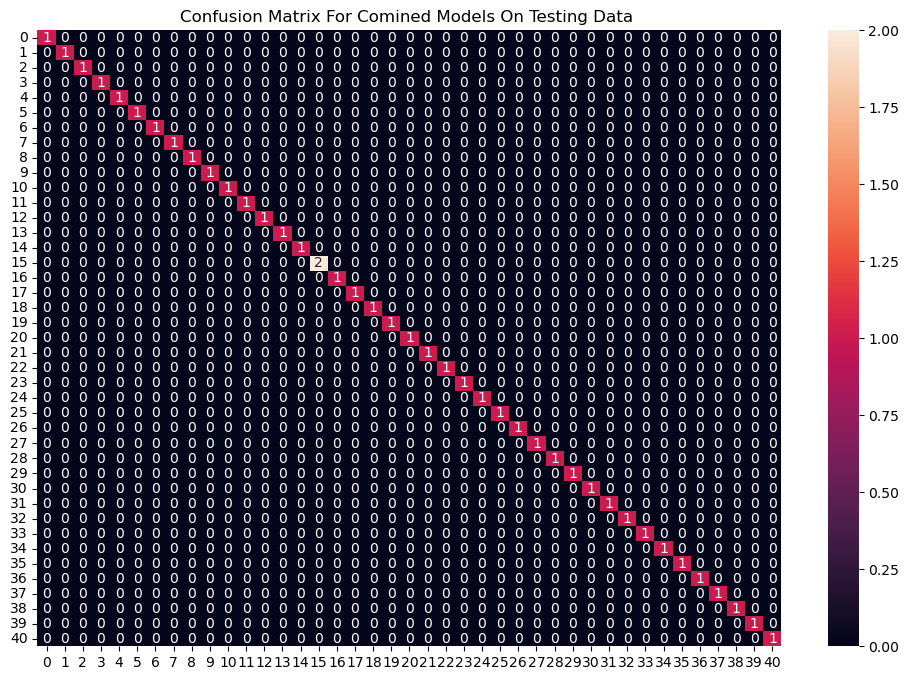

In [118]:
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model= RandomForestClassifier(random_state=18)

final_svm_model.fit(X,y)
final_nb_model.fit(X,y)
final_rf_model.fit(X,y)

test_data = pd.read_csv("Testing.csv").dropna(axis=1)
test_X = test_data.iloc[:,:-1]
test_y= test_data.iloc[:,-1]
test_y = encoder.transform(test_y)

svm_preds = svm_model.predict(test_X)
nb_preds = nb_model.predict(test_X)
rf_preds = rf_model.predict(test_X)

final_pred = [mode([i,j,k])[0][0]for i,j,k in zip(svm_preds,nb_preds,rf_preds)]
acc= accuracy_score(test_y,final_pred)
print("Accuracy on Testing Dataset by the combined Models :{}".format(acc))
cfx_matrix = confusion_matrix(test_y,final_pred)
plt.figure(figsize=(12,8))
sns.heatmap(cfx_matrix,annot=True)
plt.title("Confusion Matrix For Comined Models On Testing Data ")
plt.show()

In [146]:
symptoms= X.columns.values
symptom_index = {}
for index,value in enumerate(symptoms):
    symptom =  " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index
data_dict = {
    "symptom_index":symptom_index,
    "predictions_classes":encoder.classes_
}

def predictDisease(symptoms):
    symptoms = symptoms.split(",")
    input_data = [0]*len(data_dict["symptom_index"])
    for symptom in symptoms:
        
        index= data_dict["symptom_index"][symptom]
        input_data[index]=1
    input_data = np.array(input_data).reshape(1,-1)
        
    rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
    nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]
    svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]
     
    # making final prediction by taking mode of all predictions
    final_prediction = mode([rf_prediction, nb_prediction, svm_prediction])[0][0]
    predictions = {
          "rf_model_prediction": rf_prediction,
          "naive_bayes_prediction": nb_prediction,
          "svm_model_prediction": svm_prediction,
          "final_prediction":final_prediction
    }
    return predictions
print(predictDisease("Itching,Skin Rash,Nodal Skin Eruptions"))

{'rf_model_prediction': 'Fungal infection', 'naive_bayes_prediction': 'Fungal infection', 'svm_model_prediction': 'Fungal infection', 'final_prediction': 'Fungal infection'}


/Users/hichemcheriet/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/hichemcheriet/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/Users/hichemcheriet/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/var/folders/jw/fc8cmphd51j26cn4p980vb700000gn/T/ipykernel_21402/2568249505.py:25: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will